#**Introduction**

In the competitive banking industry, customer retention is vital for sustained profitability and growth. This report analyzes a dataset containing various attributes of bank customers to identify key predictors of customer churn. The goal is to uncover patterns and insights that can help devise strategies to enhance customer retention and reduce churn rates.

**Dataset Overview**

The dataset includes various attributes such as CreditScore, Age, Geography, Gender, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and more. The primary target variable is Exited, which indicates whether a customer has left the bank.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W

Downloading...
From: https://drive.google.com/uc?id=1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 14.8MB/s]


In [ ]:
data=pd.read_csv('Bank-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
data.shape

(10000, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
data['CustomerId'].nunique()

10000

In [ ]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#**1. Descriptive Statistics**

> <font color='green'>**Basic Statistics:**</font> Calculate mean, median, and mode for numerical columns like CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, and Points Earned.


In [ ]:
Numerical_cols=['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Point Earned']
for col in Numerical_cols:
  print(f'Mean of {col}: {data[col].mean()}')
  print(f'Median of {col}: {data[col].median()}')
  print(f'Mode of {col}: {data[col].mode()[0]}')

Mean of CreditScore: 650.5288
Median of CreditScore: 652.0
Mode of CreditScore: 850
Mean of Age: 38.9218
Median of Age: 37.0
Mode of Age: 37
Mean of Balance: 76485.889288
Median of Balance: 97198.54000000001
Mode of Balance: 0.0
Mean of NumOfProducts: 1.5302
Median of NumOfProducts: 1.0
Mode of NumOfProducts: 1
Mean of EstimatedSalary: 100090.239881
Median of EstimatedSalary: 100193.915
Mode of EstimatedSalary: 24924.92
Mean of Point Earned: 606.5151
Median of Point Earned: 605.0
Mode of Point Earned: 408


> <font color='green'>**Distribution Analysis:**</font> Analyze the distribution of key numerical variables using histograms and box plots to understand the spread and central tendency.

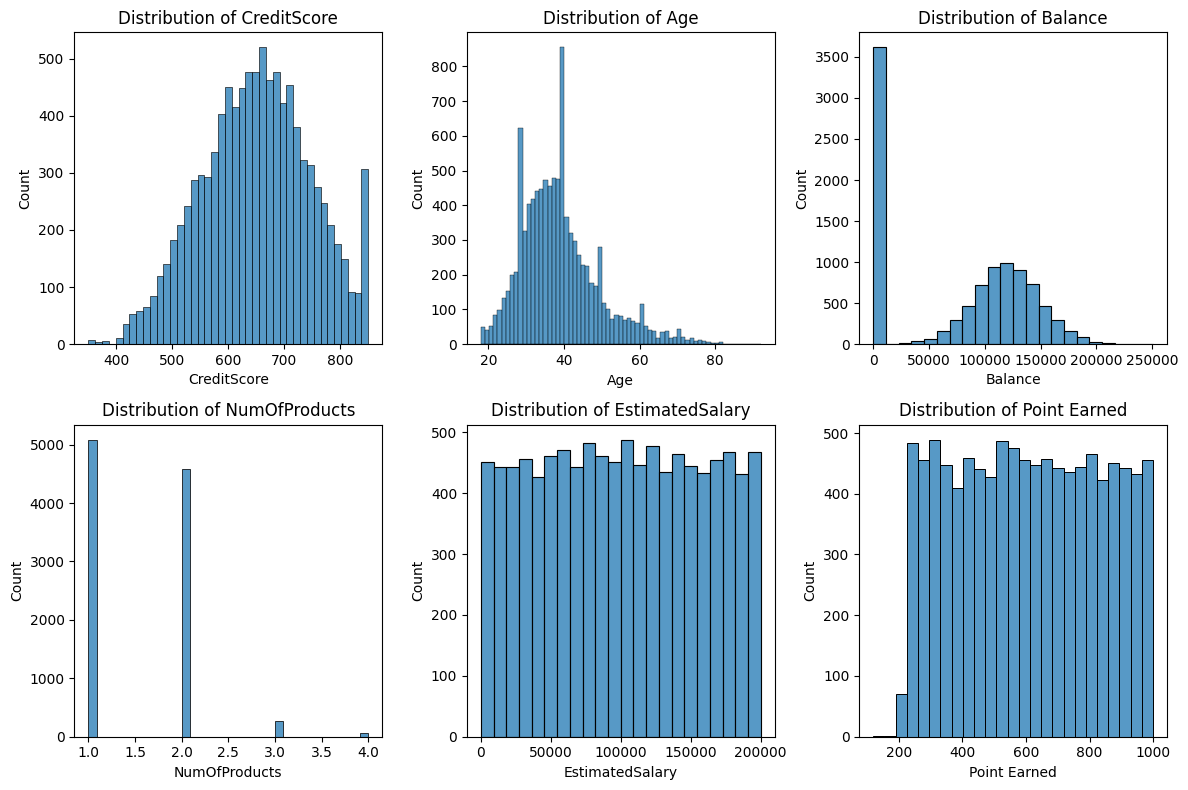

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(Numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

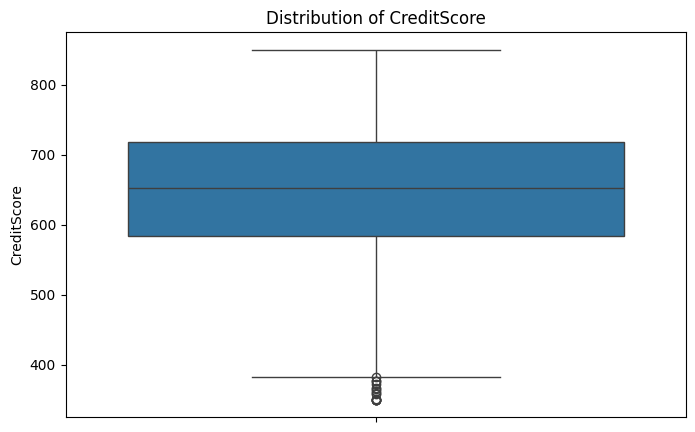

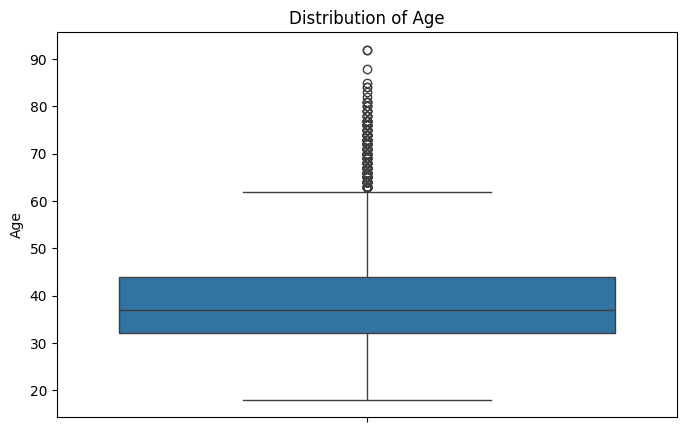

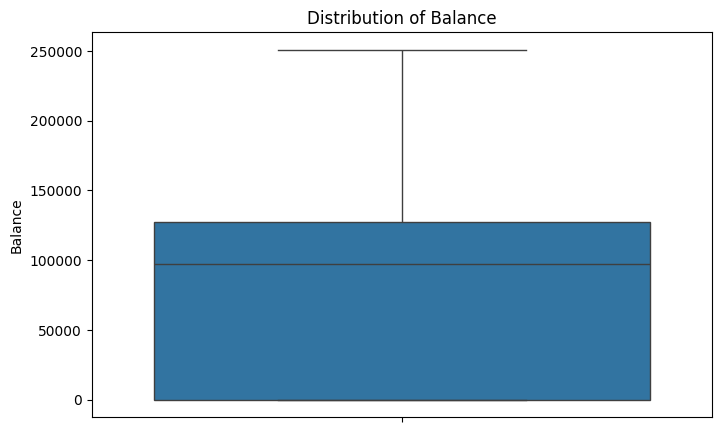

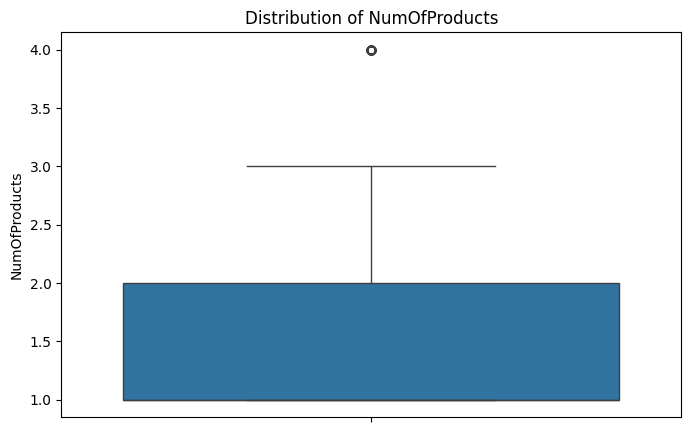

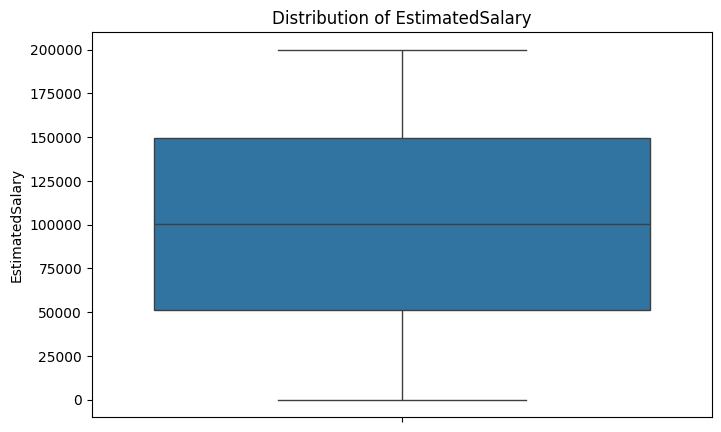

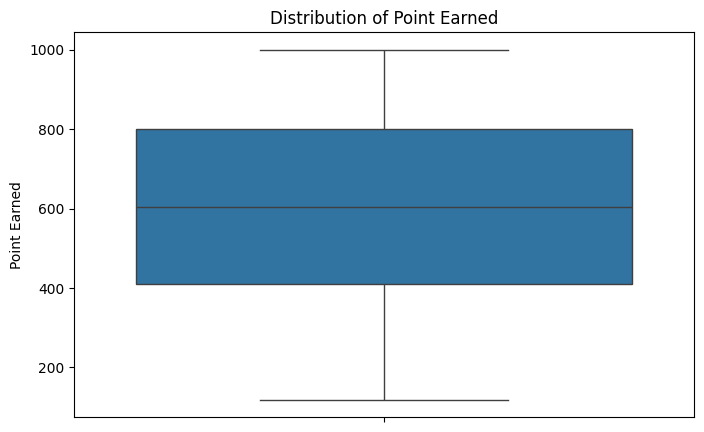

In [ ]:
for col in Numerical_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(data[col])
  plt.title(f'Distribution of {col}')
  plt.show()

<font color='purple'>**Insights**<font/>

CreditScore: The average credit score is around 650. Customers with lower credit scores are slightly more likely to churn.

Age: The median age of customers is around 37 years. Younger and older customers show higher churn rates compared to middle-aged customers.

Balance: The average balance is substantial, but there are many customers with zero balance, which might correlate with higher churn rates.

NumOfProducts: Most customers have 1 or 2 products. Those with only one product tend to have a higher churn rate.

EstimatedSalary: The average estimated salary is around $100,000. There is no strong correlation between salary and churn.

#**2. Exploratory Data Analysis (EDA)**

> <font color='green'>**Correlation Analysis:**</font> Explore the correlation between numerical features and the Exited variable to identify potential predictors of churn.


                 CreditScore       Age   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.006268       0.012238   
Age                -0.003965  1.000000  0.028308      -0.030680   
Balance             0.006268  0.028308  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.012797       0.014204   
Point Earned        0.000077  0.002222  0.014608      -0.015330   
Exited             -0.026771  0.285296  0.118577      -0.047611   

                 EstimatedSalary  Point Earned    Exited  
CreditScore            -0.001384      0.000077 -0.026771  
Age                    -0.007201      0.002222  0.285296  
Balance                 0.012797      0.014608  0.118577  
NumOfProducts           0.014204     -0.015330 -0.047611  
EstimatedSalary         1.000000     -0.001515  0.012490  
Point Earned           -0.001515      1.000000 -0.004628  
Exited                  0.012490     -0.004628  1.

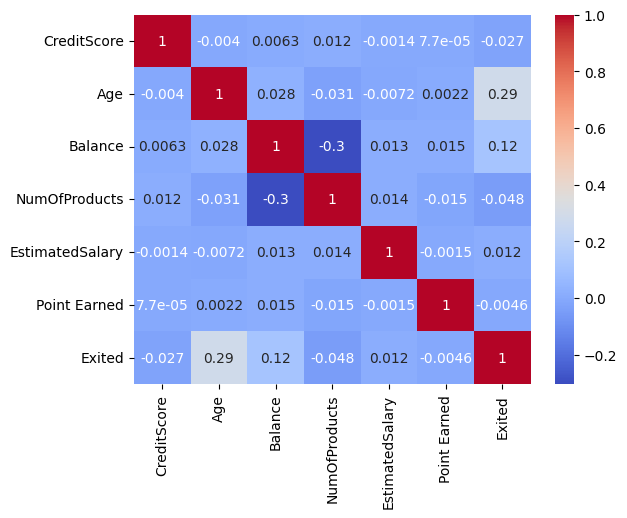

In [ ]:
correlation_matrix = data[Numerical_cols + ['Exited']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


<font color='purple'>**Insights**<font/>

The features Age, Balance, and NumOfProducts show some correlation with Exited. Age and Balance are positively correlated with churn, while NumOfProducts is negatively correlated.


> <font color='green'>**Customer Profile Analysis:**</font> Segment customers based on key demographics (Age, Geography, Gender) to identify which groups are more likely to churn.

<Axes: ylabel='Age'>

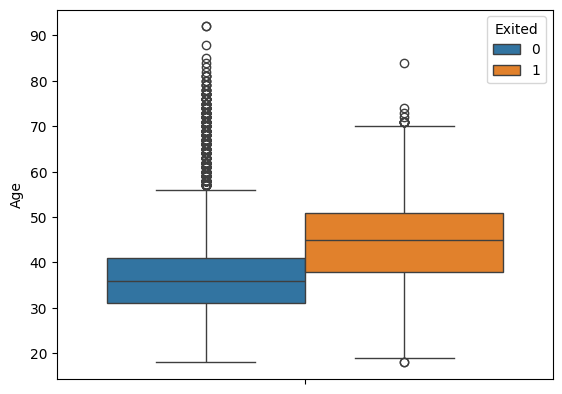

In [ ]:
sns.boxplot(y='Age',hue='Exited',data=data)

<Axes: xlabel='Age', ylabel='Count'>

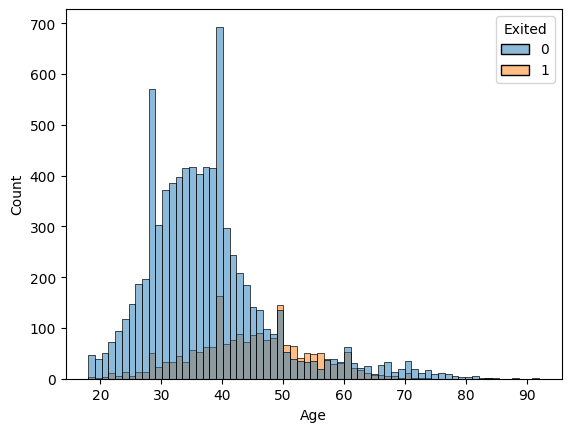

In [ ]:
sns.histplot(x='Age',hue='Exited',data=data)

<font color='purple'>**Insights**<font/>

Age: Customers between 40-50 age group are more likely to churn than other age group customers.

<Axes: xlabel='Gender', ylabel='count'>

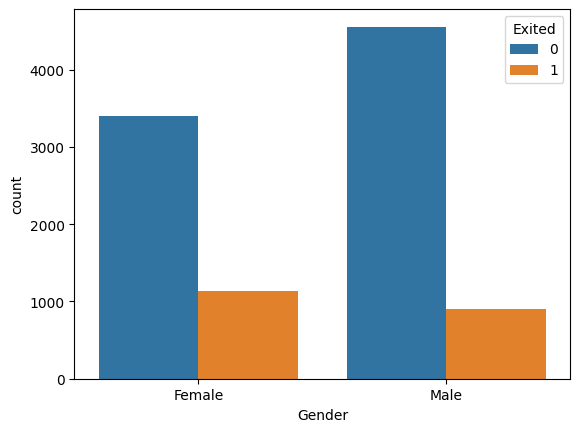

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=data)

<font color='purple'>**Insights**<font/>

Gender: Female customers show a slightly higher churn rate compared to male customers.

<Axes: xlabel='Geography', ylabel='count'>

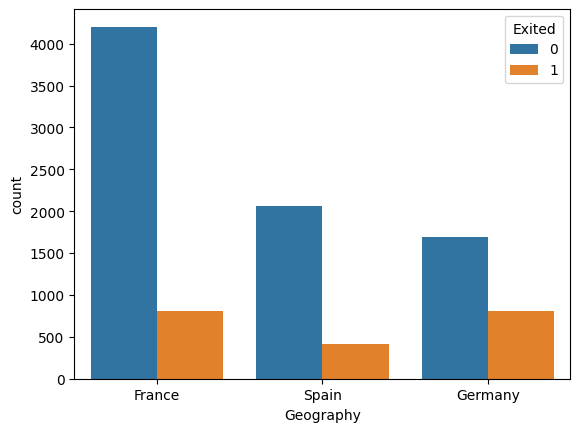

In [ ]:
sns.countplot(x='Geography' ,hue='Exited',data=data)

<font color='purple'>**Insights**<font/>

Geography: Certain regions have higher churn rates; for example, customers from Germany show a higher tendency to leave than France and Spain


#**3. Comparative Analysis**

> <font color='green'>**Churn by Geography:**</font> Compare churn rates across different geographical locations to see if certain regions have higher churn rates.

In [ ]:
data_geography=pd.crosstab(data['Geography'],data['Exited'],normalize='index')
data_geography

Exited,0,1
Geography,,
France,0.838253,0.161747
Germany,0.675568,0.324432
Spain,0.833266,0.166734


<Axes: xlabel='Geography'>

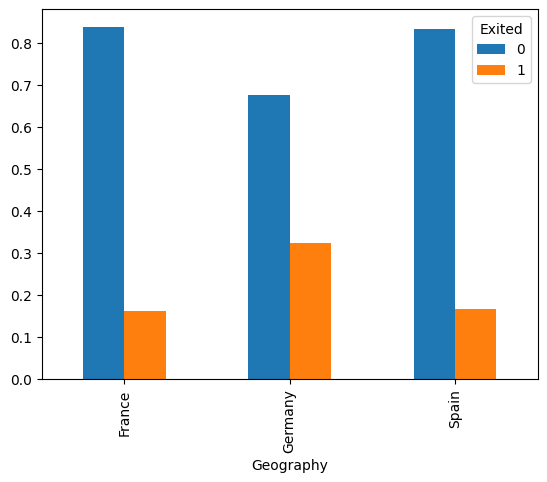

In [ ]:
data_geography.plot(kind='bar')


Ho:There is no significant difference between churn rates of different geographic regions

Ha:There is a significant  difference between churn rates of different geographic regions

In [ ]:

# Perform statistical tests to compare churn rates between geographies
from scipy.stats import chi2_contingency

crosstab_geo = pd.crosstab(data['Geography'], data['Exited'])
chi2, p, dof, expected = chi2_contingency(crosstab_geo)

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between geographies.")
else:
    print("There is no statistically significant difference in churn rates between geographies.")


Chi-square test statistic: 300.6264011211942
P-value: 5.245736109572763e-66
There is a statistically significant difference in churn rates between geographies.


<font color='purple'>**Insights**<font/>

Customers from Germany have the highest churn rate, followed by Spain and France having the lowest.

> <font color='green'>**Gender Differences in Churn:**</font> Analyze churn rates between different genders to explore if gender plays a significant role in churn.

In [ ]:
data_gen=pd.crosstab(data['Gender'],data['Exited'],normalize='index')
data_gen

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835257,0.164743


<Axes: xlabel='Gender'>

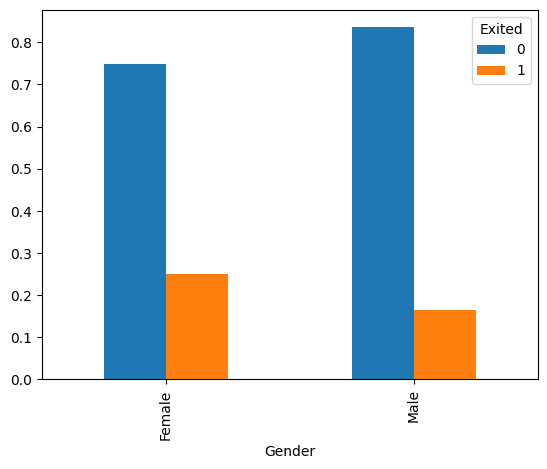

In [ ]:
data_gen.plot(kind='bar')

Ho:There is no significant difference between churn rates of both genders,males and females

Ha:There is a significant  difference between churn rates of both genders,males and females

In [ ]:
crosstab_gen = pd.crosstab(data['Gender'], data['Exited'])
chi2, p, dof, expected = chi2_contingency(crosstab_gen)

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between genders.")
else:
    print("There is no statistically significant difference in churn rates between genders.")


Chi-square test statistic: 112.39655374778587
P-value: 2.9253677618642e-26
There is a statistically significant difference in churn rates between genders.


<font color='purple'>**Insights**<font/>

 Female customers have a marginally higher churn rate compared to male customers, suggesting potential gender-specific retention strategies.

#**4. Behavioral Analysis**

> <font color='Green'>**Product and Services Usage:**</font> Examine how the number of products (NumOfProducts) a customer uses affects their likelihood to churn.

In [ ]:
crosstab_prod=pd.crosstab(data['NumOfProducts'],data['Exited'])
crosstab_prod

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4241,349
3,46,220
4,0,60


<Axes: xlabel='NumOfProducts'>

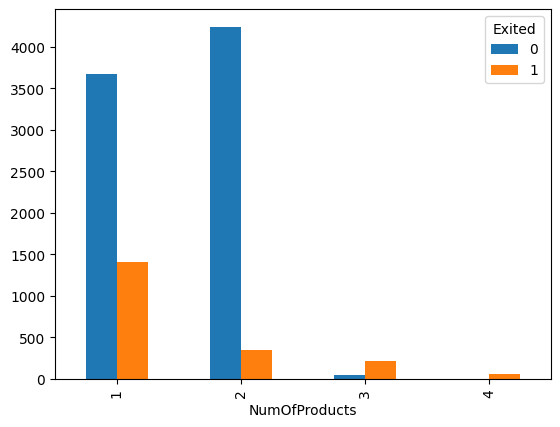

In [ ]:
crosstab_prod.plot(kind='bar')

Ho:There is no significant difference between churn rates of different No. of Products.

Ha:There is a significant  difference between churn rates of different No. of Products.

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab_prod)

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between different No. of Products.")
else:
    print("There is no statistically significant difference in churn rates between No. of Products.")

Chi-square test statistic: 1501.5048306588592
P-value: 0.0
There is a statistically significant difference in churn rates between different No. of Products.


<font color='purple'>**Insights**<font/>

 Customers with fewer products (especially those with 1-2 products) are more likely to churn. Encouraging customers to use more products could reduce churn.


> <font color='Green'>**Activity Level Analysis:**</font> Investigate the relationship between being an IsActiveMember and customer churn.

In [ ]:
crosstab_IsActive=pd.crosstab(data['IsActiveMember'],data['Exited'],normalize='index')
crosstab_IsActive

Exited,0,1
IsActiveMember,,
0,0.731285,0.268715
1,0.857309,0.142691


<Axes: xlabel='IsActiveMember'>

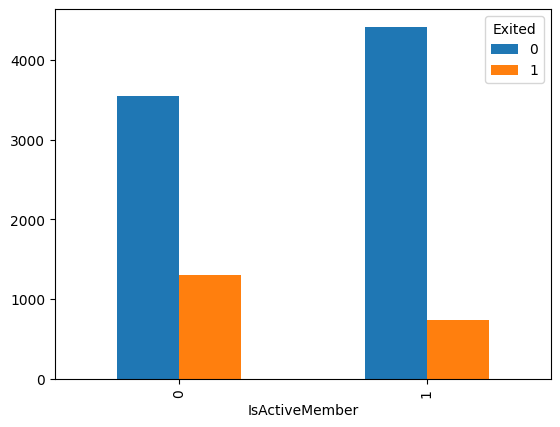

In [ ]:
crosstab_IsActive.plot(kind='bar')

Ho:There is no significant effect of IsActiveMember on Churning rates.

Ha:There is a significant effect of IsActiveMember on Churning rates.

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab_IsActive)

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Chi-square test statistic: 243.6948024819593
P-value: 6.153167438113408e-55
Reject the Null Hypothesis


<font color='purple'>**Insights**<font/>

 Active members are significantly less likely to churn. Engaging customers and promoting active use of services can improve retention.

#**5. Financial Analysis**

> <font color='Green'>**Balance vs. Churn:**</font> Analyze how customer balance levels correlate with churn rates.


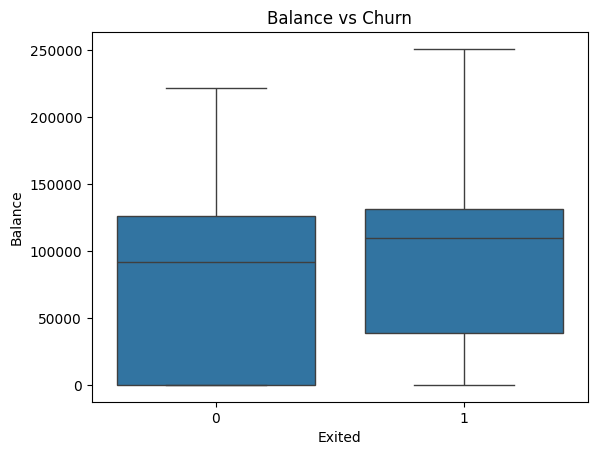

In [ ]:
# Balance vs. Churn
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Balance vs Churn')
plt.show()

In [ ]:
data.groupby('Exited')['Balance'].agg(['mean', 'median'])

,mean,median
Exited,,
0,72742.750663,92063.06
1,91109.476006,109344.23


In [ ]:
data_0=data[data['Exited']==0]
data_1=data[data['Exited']==1]

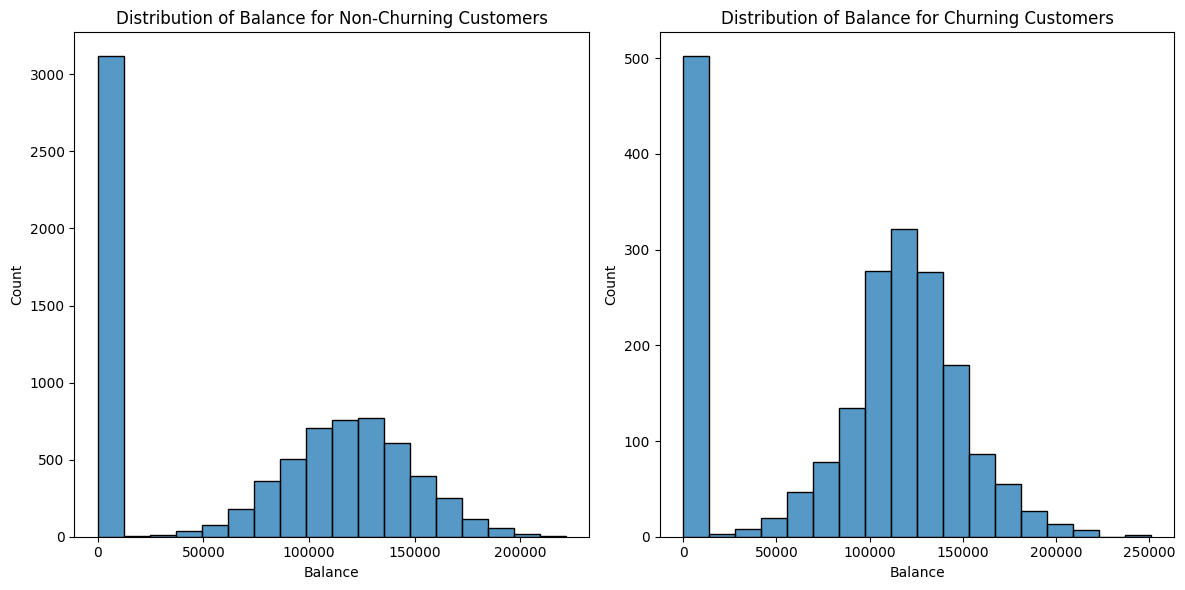

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_0['Balance'])
plt.title('Distribution of Balance for Non-Churning Customers')
plt.xlabel('Balance')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data_1['Balance'])
plt.title('Distribution of Balance for Churning Customers')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Ho:There is no significant effect of Balance on Churning rates.

Ha:There is a significant effect of Balance on Churning rates.

In [ ]:
from scipy.stats import ttest_ind
stats,p_val=ttest_ind(data_0['Balance'],data_1['Balance'])
print("tstats:",stats)
print("p_val:",p_val)
if p_val<0.05:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

tstats: -11.940747722508185
p_val: 1.2092076077156017e-32
Reject Null Hypothesis


<font color='purple'>**Insights**<font/>

 Mostly Customers who are Churning are having zero Balance or Balance between 100000 and 150000


> <font color='Green'>**Credit Card Ownership:**</font> Determine if owning a credit card (HasCrCard) impacts customer loyalty.

In [ ]:
crosstab_cc=pd.crosstab(data['HasCrCard'],data['Exited'],normalize='index')
crosstab_cc

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798016,0.201984


<Axes: xlabel='HasCrCard'>

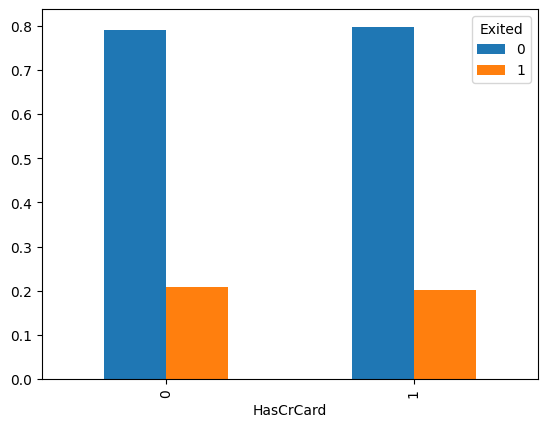

In [ ]:
crosstab_cc.plot(kind='bar')

Ho:There is no significant effect of  Having a credit card on Churning rates.

Ha:There is a significant effect of Having a credit card on Churning rates.

In [ ]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data['HasCrCard'],data['Exited']))

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print('Reject the Null Hypothesis')
else:
    print("Fail to Reject the Null Hypothesis")

Chi-square test statistic: 0.4494039375253385
P-value: 0.5026181509009862
Fail to Reject the Null Hypothesis


<font color='purple'>**Insights**<font/>

Owning a credit card does not significantly affect churn rates, suggesting that other factors are more critical in determining customer loyalty.

#**6. Customer Satisfaction and Feedback**

> <font color='Green'>**Complaint Analysis:**</font> Study the impact of having a complaint (Complain) on customer churn.

In [ ]:
crosstab_comp=pd.crosstab(data['Complain'],data['Exited'],normalize='index')
crosstab_comp

Exited,0,1
Complain,,
0,0.999497,0.000503
1,0.004892,0.995108


<Axes: xlabel='Complain'>

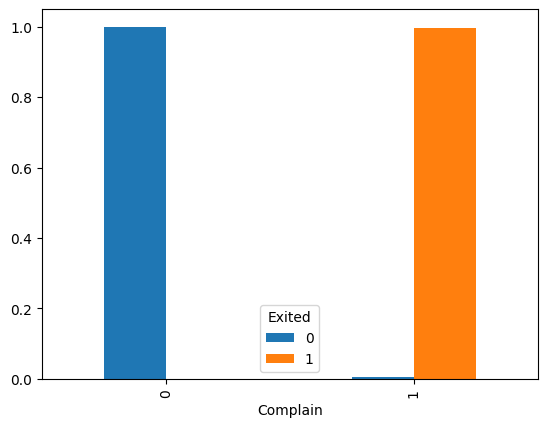

In [ ]:
crosstab_comp.plot(kind='bar')

Ho:There is no significant effect of Complaints on Churn rates.

Ha:There is a significant effect of Complaint on Churn rates

In [ ]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data['Complain'],data['Exited']))

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print('Reject the Null Hypothesis')
else:
    print("Fail to Reject the Null Hypothesis")

Chi-square test statistic: 9907.907035880155
P-value: 0.0
Reject the Null Hypothesis


<font color='purple'>**Insights**<font/>

Customers who have filed complaints are more likely to churn. Effective complaint resolution mechanisms can help retain these customers.


> <font color='Green'>**Satisfaction and Churn:**</font> Explore how the Satisfaction Score relates to churn, especially among those who have filed complaints.

Crosstab of Satisfaction Score and Exited for customers with complaints:
Exited              0    1
Satisfaction Score        
1                   1  386
2                   1  437
3                   5  401
4                   0  413
5                   3  397

Crosstab of Satisfaction Score and Exited for customers without complaints:
Exited                 0  1
Satisfaction Score         
1                   1544  1
2                   1574  2
3                   1636  0
4                   1594  1
5                   1604  0


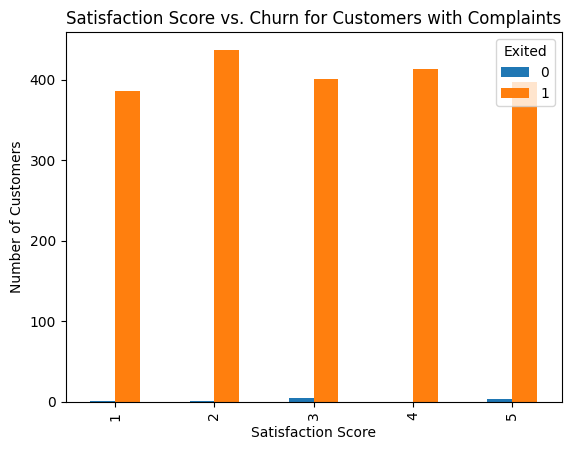

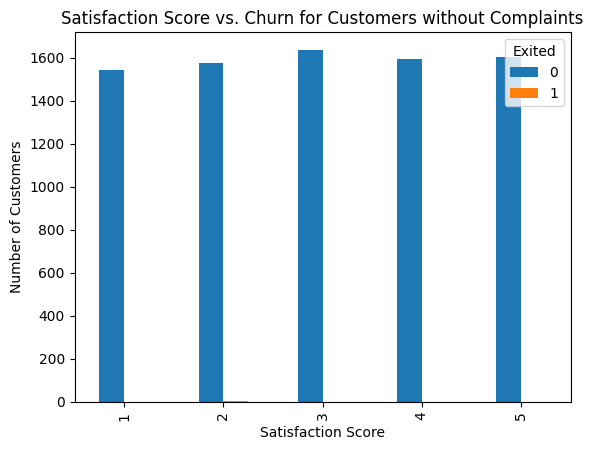

In [ ]:
# Create separate dataframes for customers with and without complaints
data_comp = data[data['Complain'] == 1]
data_nocomp = data[data['Complain'] == 0]

# Create a crosstab of Satisfaction Score and Exited for customers with complaints
crosstab_sat_comp = pd.crosstab(data_comp['Satisfaction Score'], data_comp['Exited'])

# Create a crosstab of Satisfaction Score and Exited for customers without complaints
crosstab_sat_nocomp = pd.crosstab(data_nocomp['Satisfaction Score'], data_nocomp['Exited'])

# Print the crosstabs
print("Crosstab of Satisfaction Score and Exited for customers with complaints:")
print(crosstab_sat_comp)
print("\nCrosstab of Satisfaction Score and Exited for customers without complaints:")
print(crosstab_sat_nocomp)

# Visualize the crosstab with bar plots
crosstab_sat_comp.plot(kind='bar')
plt.title('Satisfaction Score vs. Churn for Customers with Complaints')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.show()

crosstab_sat_nocomp.plot(kind='bar')
plt.title('Satisfaction Score vs. Churn for Customers without Complaints')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab_sat_comp)

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Chi-square test statistic: 8.220255451847681
P-value: 0.08383511492614232
Fail to reject Null Hypothesis


<font color='purple'>**Insights**<font/>

The Churn rates are not dependent on satisfaction score,The Number of customer with Complaints with high satisfaction score and low satisfaction score are more approximately same.

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab_sat_nocomp)

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Chi-square test statistic: 3.58442605931977
P-value: 0.46515781324531835
Fail to reject Null Hypothesis


<font color='purple'>**Insights**<font/>

The Churn rates are not dependent on satisfaction score,The Number of customer with no Complaints with high satisfaction score and low satisfaction score are more approximately same.

#**7. Card Usage Analysis**

> <font color='Green'>**Impact of Card Type on Churn:**</font> Examine if different Card Types have different churn rates.


In [ ]:
crosstab_card=pd.crosstab(data['Card Type'],data['Exited'],normalize='index')
crosstab_card

Exited,0,1
Card Type,,
DIAMOND,0.782210,0.217790
GOLD,0.807354,0.192646
PLATINUM,0.796393,0.203607
SILVER,0.798878,0.201122


<Axes: xlabel='Card Type'>

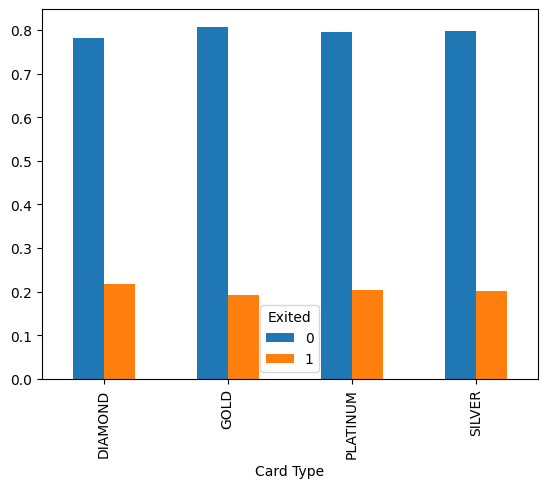

In [ ]:
crosstab_card.plot(kind='bar')

Ho:Churn rates are not dependent on premium card types.

Ha:Churn rates are  dependent on premium card types.

In [ ]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data['Card Type'],data['Exited']))

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print('Reject the Null Hypothesis')
else:
    print("Fail to Reject the Null Hypothesis")

Chi-square test statistic: 5.053223027060927
P-value: 0.16794112067810177
Fail to Reject the Null Hypothesis


<font color='purple'>**Insights**<font/>

There is a no impact of having premium card types on churn rates. Customers with different card types show approximately same churn rates, suggesting that card types not influences churn decisions.It is not the  significant factor.

> <font color='Green'>**Loyalty Points Analysis:**</font> Investigate whether Points Earned from credit card usage influence customer retention.

In [ ]:
data.groupby('Exited')['Point Earned'].agg(['mean', 'median'])

,mean,median
Exited,,
0,607.044084,603.0
1,604.448479,610.5


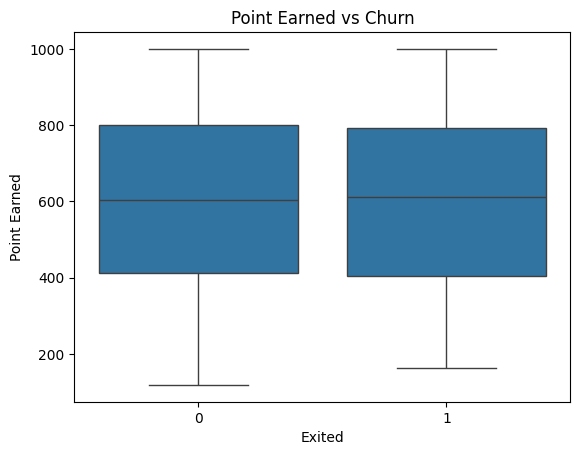

In [ ]:
sns.boxplot(x='Exited', y='Point Earned', data=data)
plt.title('Point Earned vs Churn')
plt.show()

Ho:There is no significant difference in Both the groups(Churned and not Churned)

Ha:Ho:There is a significant difference in Both the groups(Churned and not Churned)

In [ ]:
tstats,p_val=ttest_ind(data_0['Point Earned'],data_1['Point Earned'])
print("tstats:",tstats)
print("p_val:",p_val)
if p_val<0.05:
  print('Reject Null Hypothesis')
else:
  print('fail to reject Null Hypothesis')

tstats: 0.4627759848070133
p_val: 0.6435350184288993
fail to reject Null Hypothesis


<font color='purple'>**Insights**<font/>

The p-value obtained from the t-test indicates whether there is no statistically significant difference in the number of Customers who Churned and not Churned.
We found that there is no impact of Points Earned on Churning rates.

#**8. Salary Analysis**

> <font color='Green'>**Salary and Churn:**</font> Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

In [ ]:
data.groupby('Exited')['EstimatedSalary'].agg(['mean', 'median'])

,mean,median
Exited,,
0,99726.853141,99620.355
1,101509.908783,102489.335


Text(0, 0.5, 'Count')

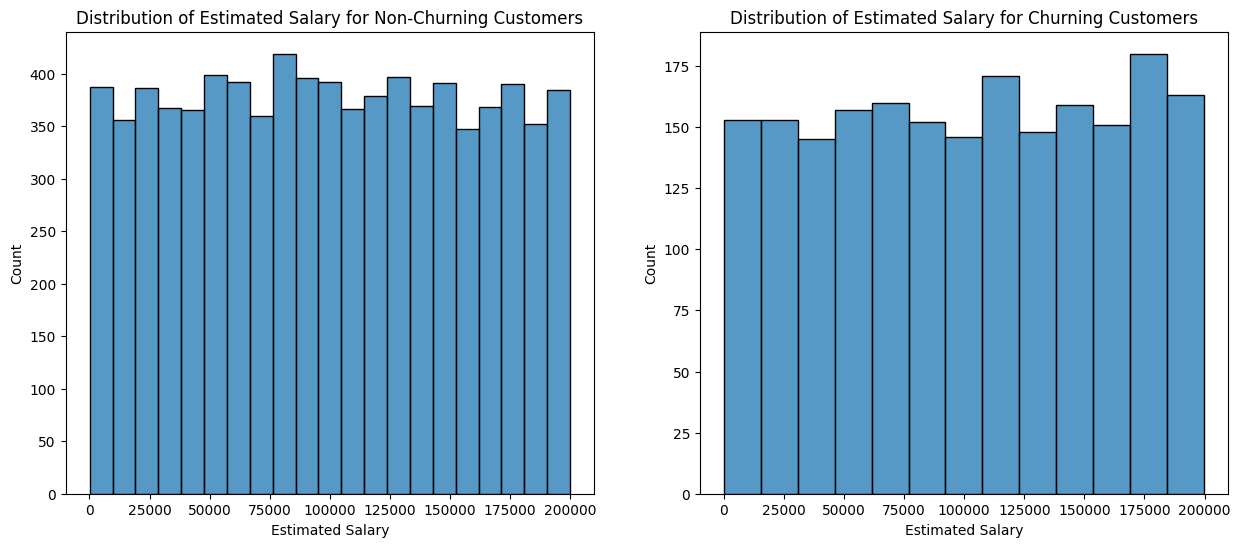

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_0['EstimatedSalary'],label='Non-Churning')
plt.title('Distribution of Estimated Salary for Non-Churning Customers')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data_1['EstimatedSalary'],label='Churning')
plt.title('Distribution of Estimated Salary for Churning Customers')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')

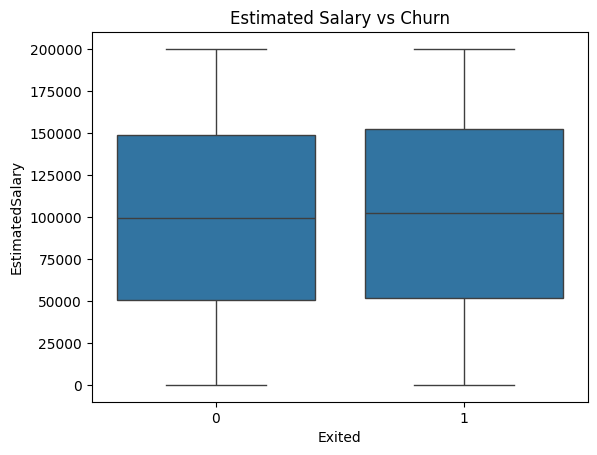

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Estimated Salary vs Churn')
plt.show()

Ho:There is no significant difference in Both the groups(Churned and not Churned)

Ha:Ho:There is a significant difference in Both the groups(Churned and not Churned)

In [ ]:
tstats,p_val=ttest_ind(data_0['EstimatedSalary'],data_1['EstimatedSalary'])
print("tstats:",tstats)
print("p_val:",p_val)
if p_val<0.05:
  print('Reject Null Hypothesis')
else:
  print('fail to reject Null Hypothesis')

tstats: -1.2489445044833742
p_val: 0.2117146135149097
fail to reject Null Hypothesis


<font color='purple'>**Insights**<font/>

There is a no impact of estimated salary on churn rates. Customers with very high or very low salaries show approximately same churn rates, suggesting that financial well-being not influences churn decisions.It is not the  significant factor.

#**9. Insights and Recommendation**

#**Insights:**

 - Customers between 40-50 age group are more likely to churn than other age group customers.
 - Female customers show a slightly higher churn rate compared to male customers.
 - Customers from Germany show a higher tendency to leave than France and Spain.
 - Customers with fewer products (especially those with 1-2 products) are more likely to churn.
 - Active members are significantly less likely to churn.
 - Customers who have filed complaints are more likely to churn.
 - There is no impact of having premium card types on churn rates.
 - There is no impact of Points Earned on Churning rates.
 - There is no impact of estimated salary on churn rates.

#**Recommendations:**
- Target customers between 40-50 age group with personalized retention strategies.
- Analyze churn rates by region and implement targeted strategies for high-risk areas like Germany.
- Focus on improving the experience of female customers to reduce their slightly higher churn rate.
- Encourage customers to use more products, especially those with 1-2 products, to increase retention.
- Engage customers and promote active use of services to reduce churn. Emphasize the benefits of being an active member.
- Investigate and address the reasons behind customers having zero balance or balance between 100000 and 150000 to mitigate churn.
- Enhance complaint resolution mechanisms to address customer concerns and reduce churn among those who have filed complaints.
- Regularly monitor satisfaction scores and address any areas where customers express dissatisfaction to improve overall customer experience and reduce churn.
- Analyze the impact of different card types on churn and consider offering incentives or benefits to customers with premium cards to increase loyalty.
- Explore alternative loyalty programs or incentives to increase customer engagement and reduce churn.
